#### in this notebook you will find many different ways to do same thing , i've tried to demonstrate different methods as much as possible for better learning , the whole code can be compressed but i wanted to use more codes and more methods 

In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 400
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("uber-raw-data-apr14.csv")
data

Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]

In [13]:
data

Date/Time      Lat      Lon    Base  dom  weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

[564516 rows x 7 columns]

In [4]:
type(data["Date/Time"][0])

str

In [5]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

In [4]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

#### adding new additional columns for day of months


In [4]:
dt = data["Date/Time"][0]
dt
# dt.weekday()

Timestamp('2014-04-01 00:11:00')

In [41]:
dt.day

1

In [6]:
def dom(x):
    return x.day
data["dom"] = data["Date/Time"].map(dom)

In [7]:
def dow(x):
    return x.weekday()
data["weekday"] = data["Date/Time"].map(dow)

def doh(x):
    return x.hour
data["Hour"] = data["Date/Time"].map(doh)

In [8]:
data

Date/Time      Lat      Lon    Base  dom  weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

[564516 rows x 7 columns]

#### analysis

##### analyze the date of month

In [9]:
data.groupby("dom").count()

Date/Time    Lat    Lon   Base  weekday   Hour
dom                                                
1        14546  14546  14546  14546    14546  14546
2        17474  17474  17474  17474    17474  17474
3        20701  20701  20701  20701    20701  20701
4        26714  26714  26714  26714    26714  26714
5        19521  19521  19521  19521    19521  19521
6        13445  13445  13445  13445    13445  13445
7        19550  19550  19550  19550    19550  19550
8        16188  16188  16188  16188    16188  16188
9        16843  16843  16843  16843    16843  16843
10       20041  20041  20041  20041    20041  20041
11       20420  20420  20420  20420    20420  20420
12       18170  18170  18170  18170    18170  18170
13       12112  12112  12112  12112    12112  12112
14       12674  12674  12674  12674    12674  12674
15       20641  20641  20641  20641    20641  20641
16       17717  17717  17717  17717    17717  17717
17       20973  20973  20973  20973    20973  20973
18       18074  18074  18074  18074    18074  18074
19       14602  14602  14602  14602    14602  14602
20       11017  11017  11017  11017    11017  11017
21       13162  13162  13162  13162    13162  13162
22       16975  16975  16975  16975    16975  16975
23       20346  20346  20346  20346    20346  20346
24       23352  23352  23352  23352    23352  23352
25       25095  25095  25095  25095    25095  25095
26       24925  24925  24925  24925    24925  24925
27       14677  14677  14677  14677    14677  14677
28       15475  15475  15475  15475    15475  15475
29       22835  22835  22835  22835    22835  22835
30       36251  36251  36251  36251    36251  36251

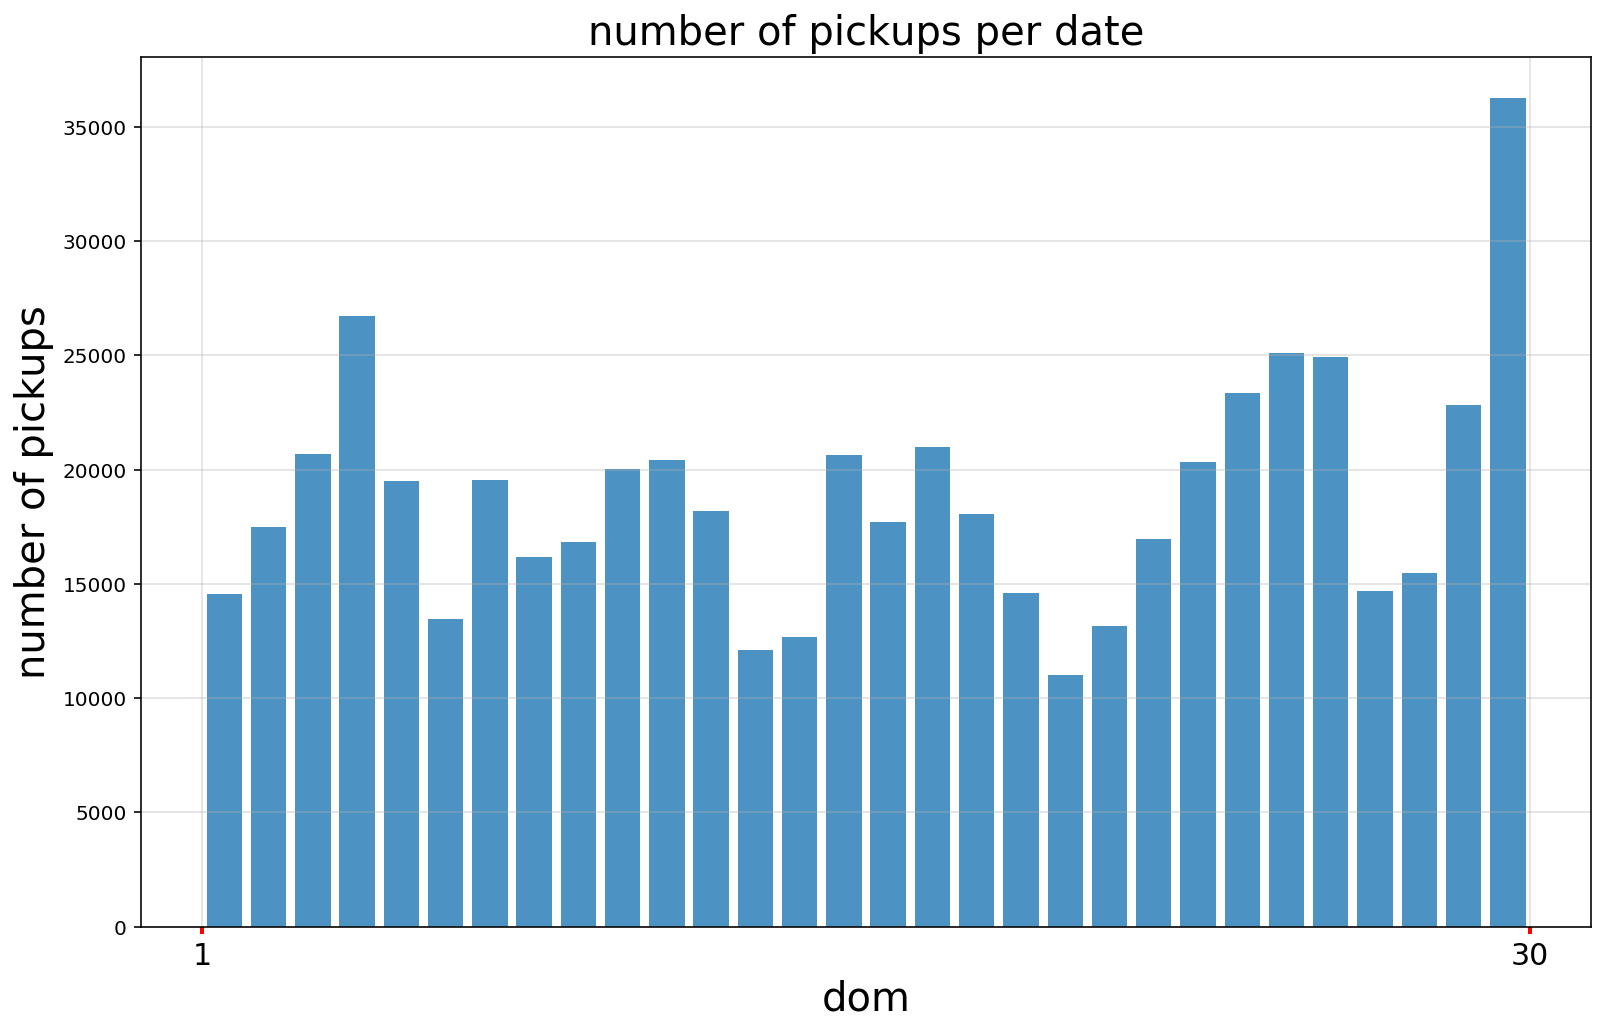

In [17]:
fig, ax = plt.subplots(figsize=(13, 8))
hist(data.dom ,bins= 30 , rwidth = .8, range = (1,30), alpha = .8)
xlabel("dom", fontsize = 20)
ylabel("number of pickups", fontsize = 20)
title("number of pickups per date", fontsize = 20)
plt.tick_params(axis='x', which='both',color = 'r',width = 2 ,labelsize=15, pad = 4
                ,direction ='out')
xticks((1,30))
grid(alpha = .4)
plt.show()

In [18]:
data_grouped_by_weekday = data.groupby("weekday").count()
data_grouped_by_weekday["Lat"]

weekday
0     60861
1     91185
2    108631
3     85067
4     90303
5     77218
6     51251
Name: Lat, dtype: int64

In [19]:
day= ["Mon", 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


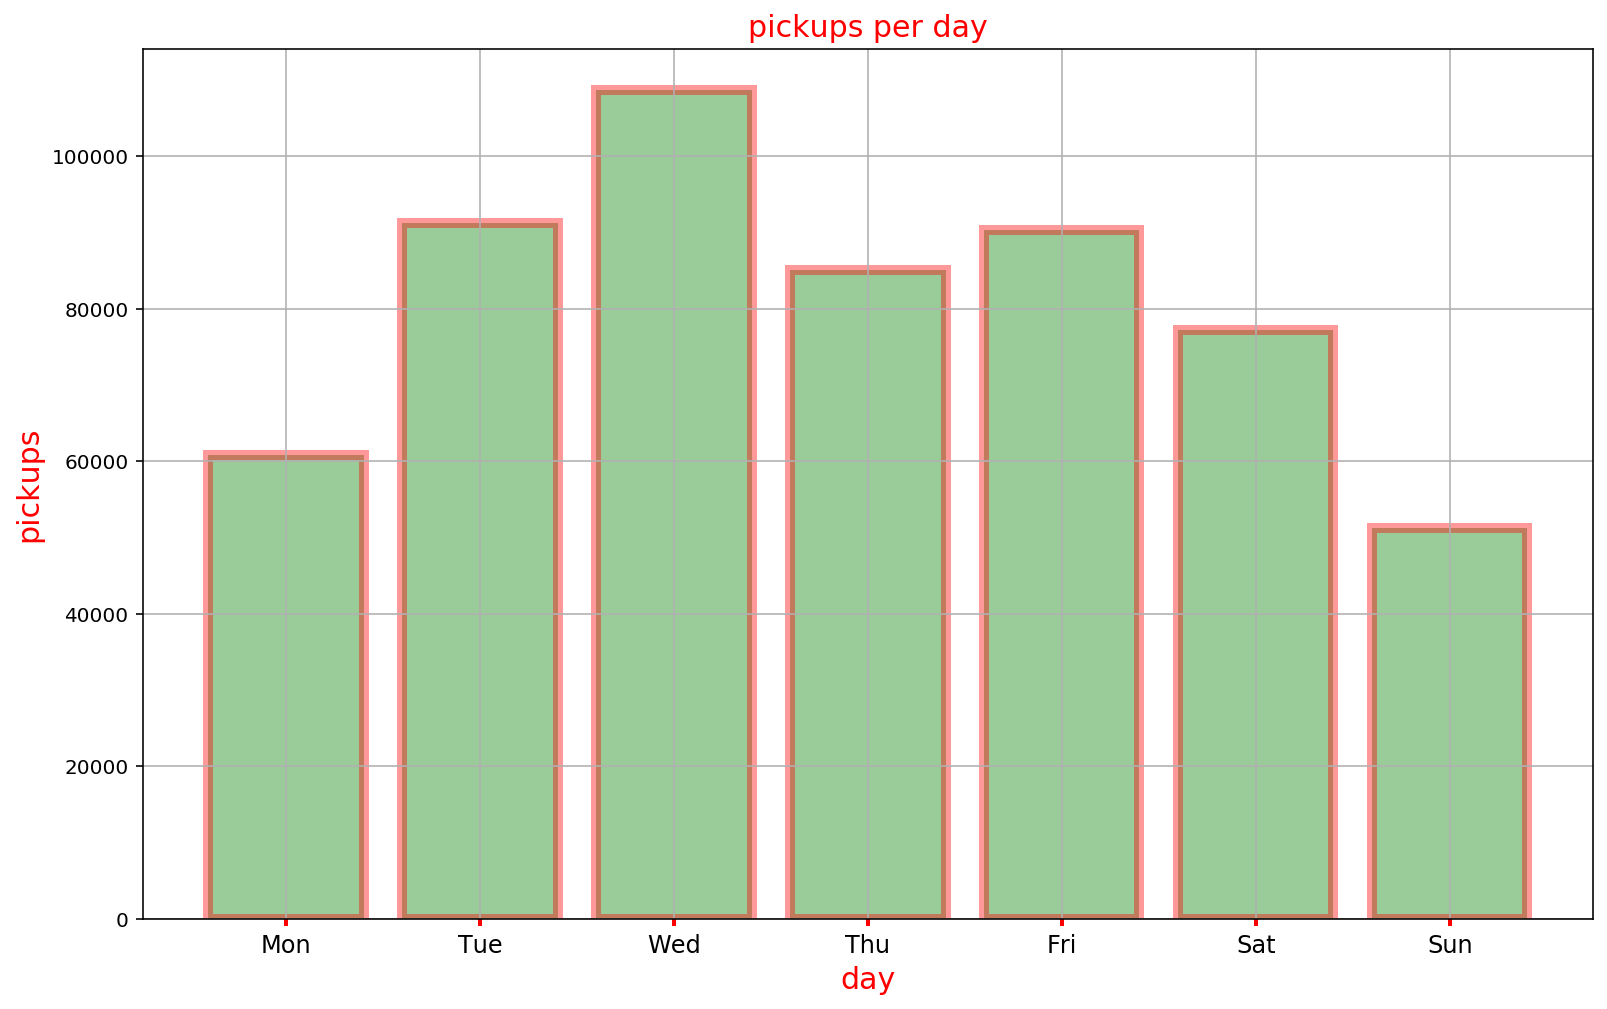

In [22]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.bar(day,data_grouped_by_weekday["Lat"], color = 'g', edgecolor = 'r', linewidth = 5, alpha =.4 )
xlabel("day" , color = 'r', fontsize = 15 )
ylabel("pickups", color = "r", fontsize = 15)
title("pickups per day", loc = "center", color = 'r', fontsize = 15)
plt.tick_params(axis='x', which='both',color = 'r',width = 2 ,labelsize=15, pad = 4
                ,direction ='out')
xticks(day, size = 12)
grid()
plt.show()

#### Task 2 

##### doing same thing by defining a function

In [23]:
def count_rows(x):
    return len(x)

In [24]:
by_date = data.groupby("dom").apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [25]:
by_date.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64', name='dom')

In [26]:
asc_values = by_date.sort_values()
asc_values

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

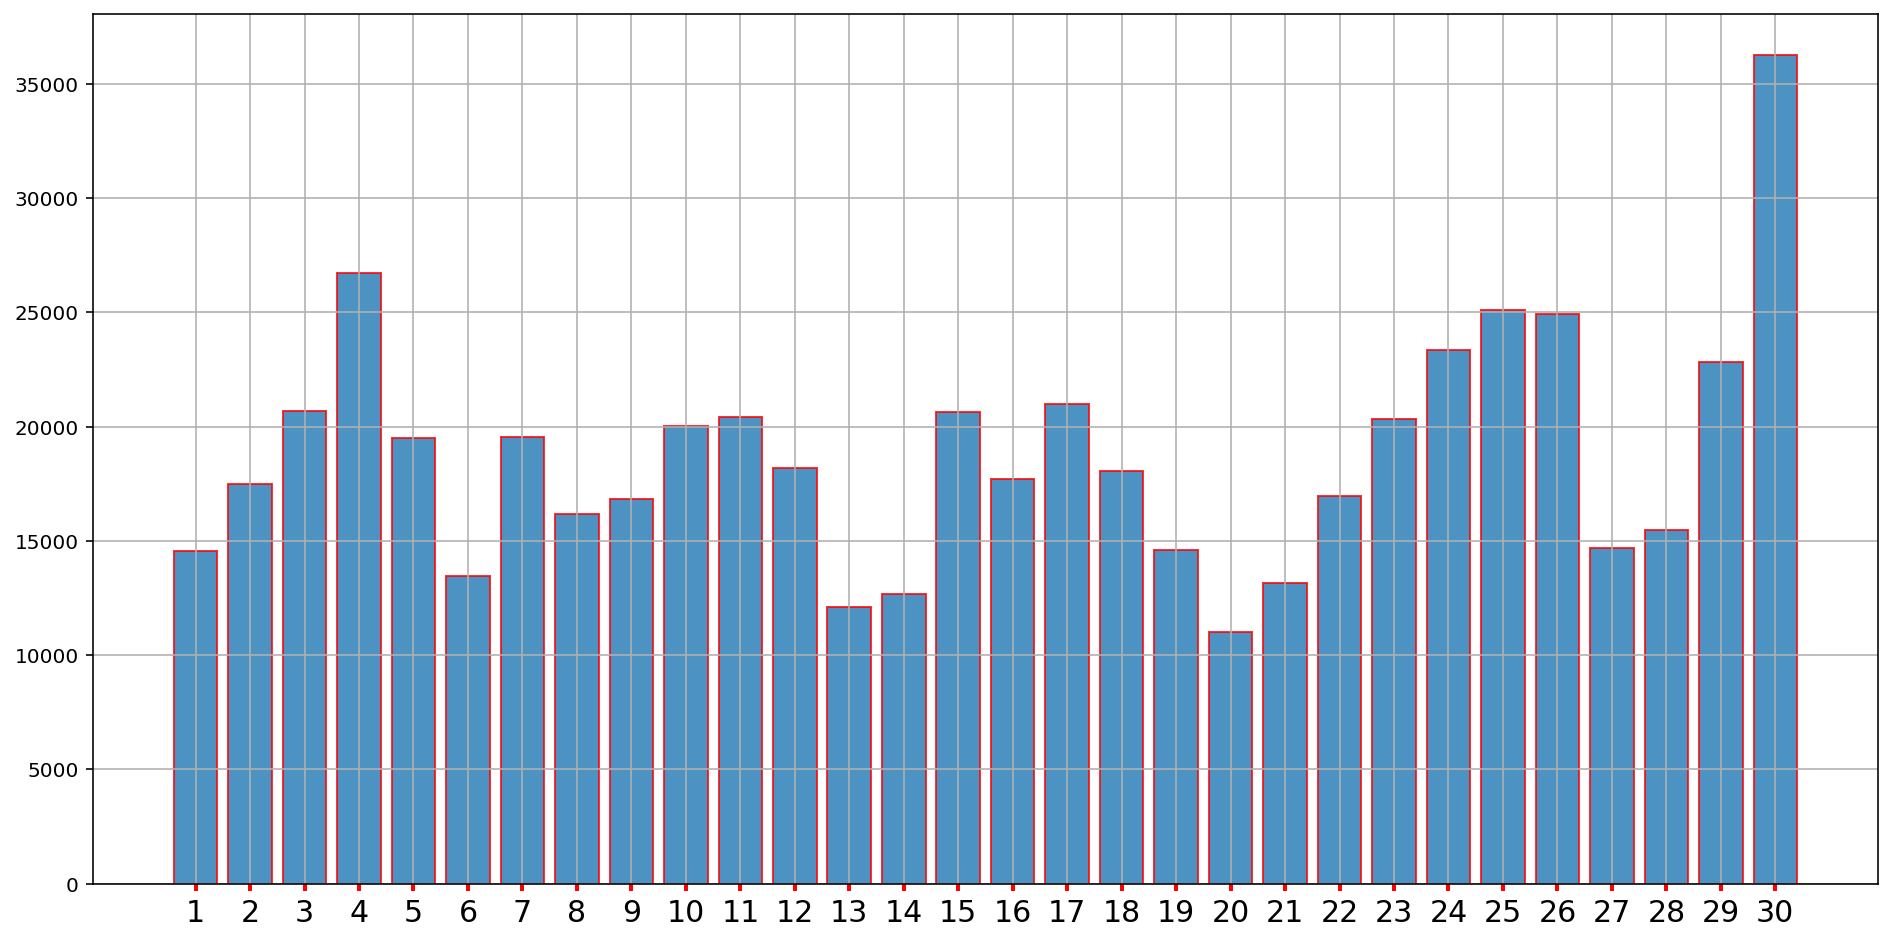

In [27]:

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(asc_values.index,asc_values, width = 0.8,edgecolor = 'r', linewidth = 1, alpha = .8)
xticks(asc_values.index, rotation = 0, fontsize = 20)
grid()
plt.tick_params(axis='x', which='both',color = 'r',width = 2 ,labelsize=15, pad = 4
                ,direction ='out')
plt.show()

#### analysing the hours in uber database

In [28]:
by_hour = data.groupby("Hour")["Lat"].count()
by_hour

Hour
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
Name: Lat, dtype: int64

In [29]:
import datetime as dt
hours = [(dt.time(i).strftime('%I %p')) for i in range(24)]

In [30]:
hours

['12 AM',
 '01 AM',
 '02 AM',
 '03 AM',
 '04 AM',
 '05 AM',
 '06 AM',
 '07 AM',
 '08 AM',
 '09 AM',
 '10 AM',
 '11 AM',
 '12 PM',
 '01 PM',
 '02 PM',
 '03 PM',
 '04 PM',
 '05 PM',
 '06 PM',
 '07 PM',
 '08 PM',
 '09 PM',
 '10 PM',
 '11 PM']

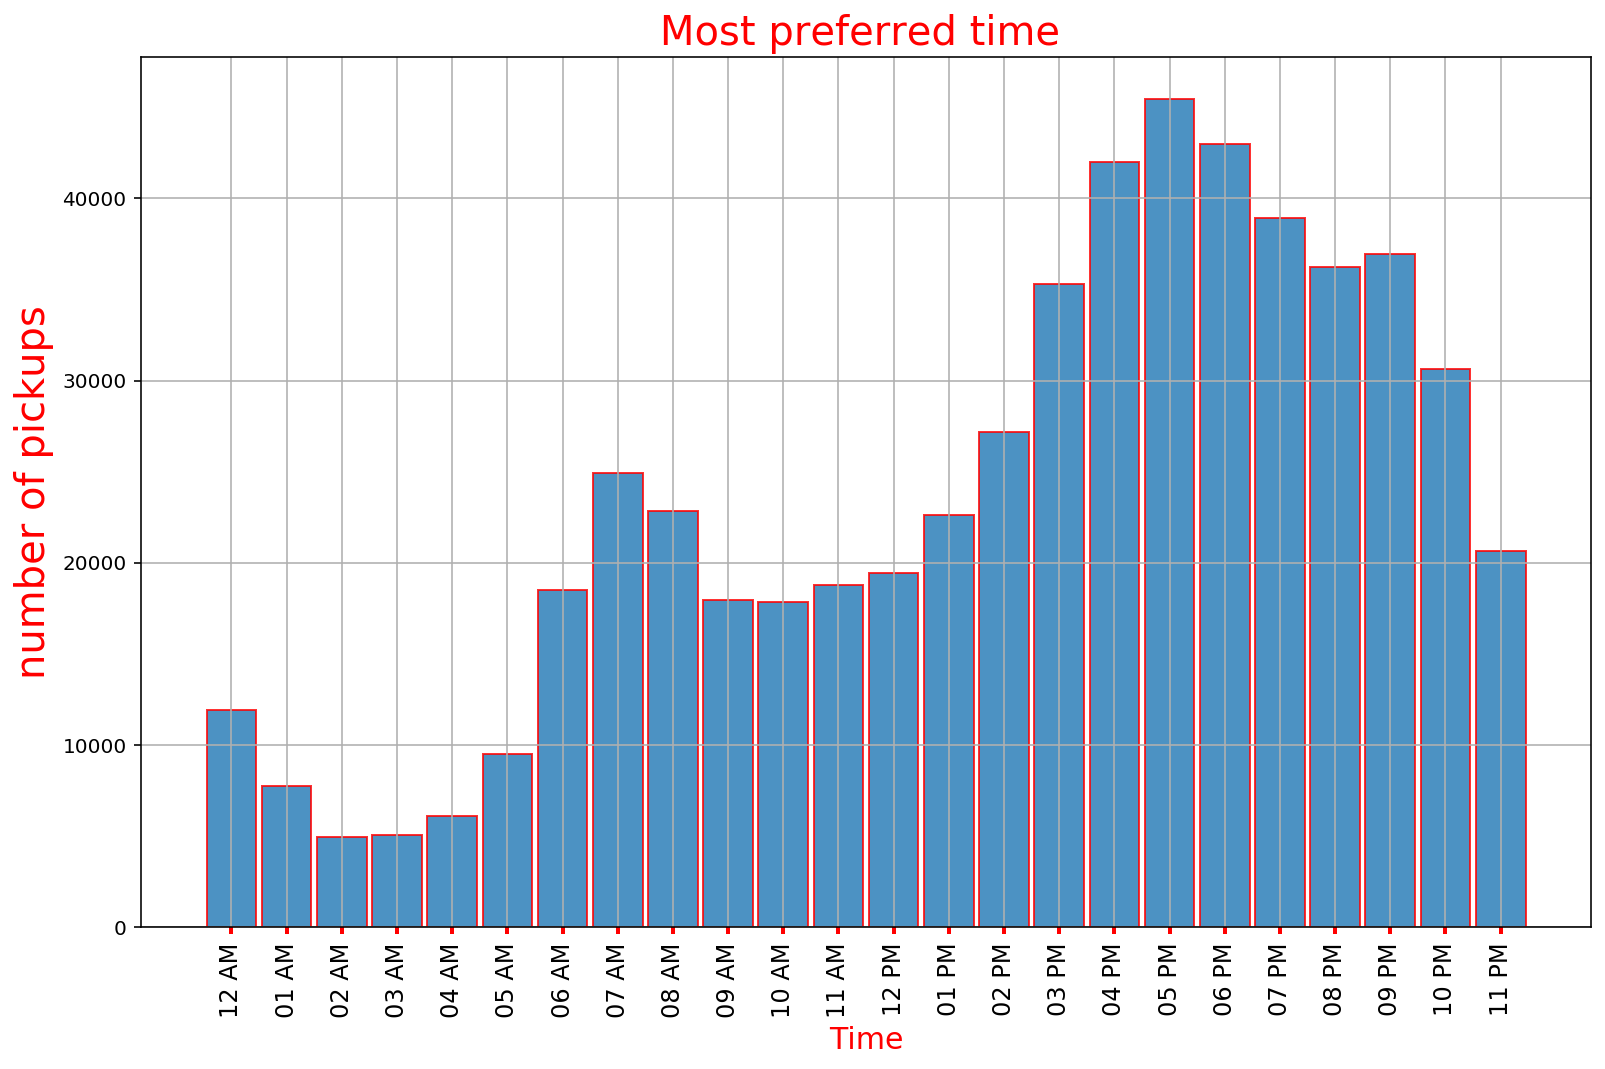

In [31]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.bar(hours, by_hour, width = 0.9, alpha = .8, edgecolor = 'r')
# fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
# ax.tick_params(axis = 'x', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)


xticks(hours, rotation = 'vertical' )
ylabel("number of pickups",fontsize = 20, color ='r')
xlabel("Time", color = 'r', size = 20 , fontsize = 15)
title("Most preferred time ", fontsize = 20, color ='r')
plt.grid()

plt.tick_params(axis='x', which='both',color = 'r',width = 2 ,labelsize=12, pad = 4
                ,direction ='out')
plt.show()



#### cross analysis between weekday and hours 

In [32]:
cross = data.groupby(["weekday","Hour"])["Lat"].count().unstack()
cross

Hour       0     1     2     3     4     5     6     7     8     9   ...  \
weekday                                                              ...   
0         518   261   238   571  1021  1619  2974  3888  3138  2211  ...   
1         765   367   304   516   887  1734  3766  5304  4594  2962  ...   
2         899   507   371   585  1003  1990  4230  5647  5242  3846  ...   
3         792   459   342   567   861  1454  3179  4159  3616  2654  ...   
4        1367   760   513   736   932  1382  2836  3943  3648  2732  ...   
5        3027  2479  1577  1013   706   704   844  1110  1372  1764  ...   
6        4542  2936  1590  1052   685   593   669   873  1233  1770  ...   

Hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1        4489  6042  7521  8297  7089  6459  6310  5993  3614  1948  
2        5438  7071  8213  9151  8334  7794  7783  6921  4845  2571  
3        4083  5182  6149  6951  6637  5929  6345  6585  5370  2909  
4        4087  5354  6259  6790  7258  6247  5165  6265  6708  5393  
5        3042  4457  5410  5558  6165  5529  4792  5811  6493  5719  
6        2934  3400  3489  3154  2795  2579  2276  2310  1639  1018  

[7 rows x 24 columns]

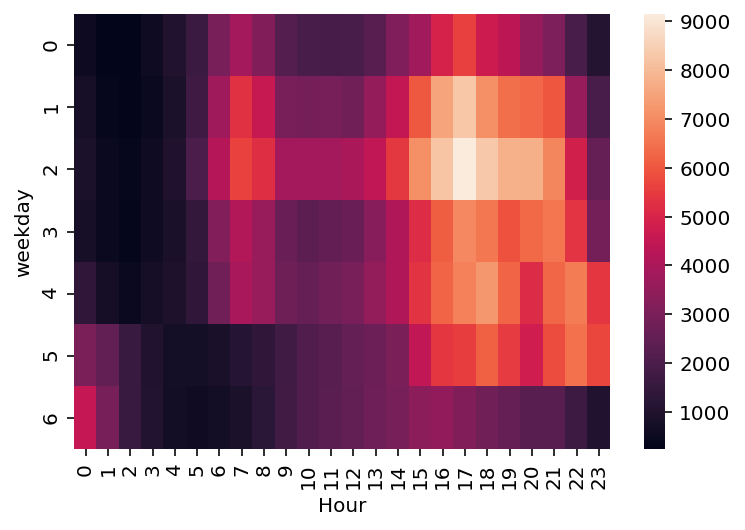

In [33]:
sns.heatmap(cross)

#### task 4 , respresenting the locations where the longitude and latitude

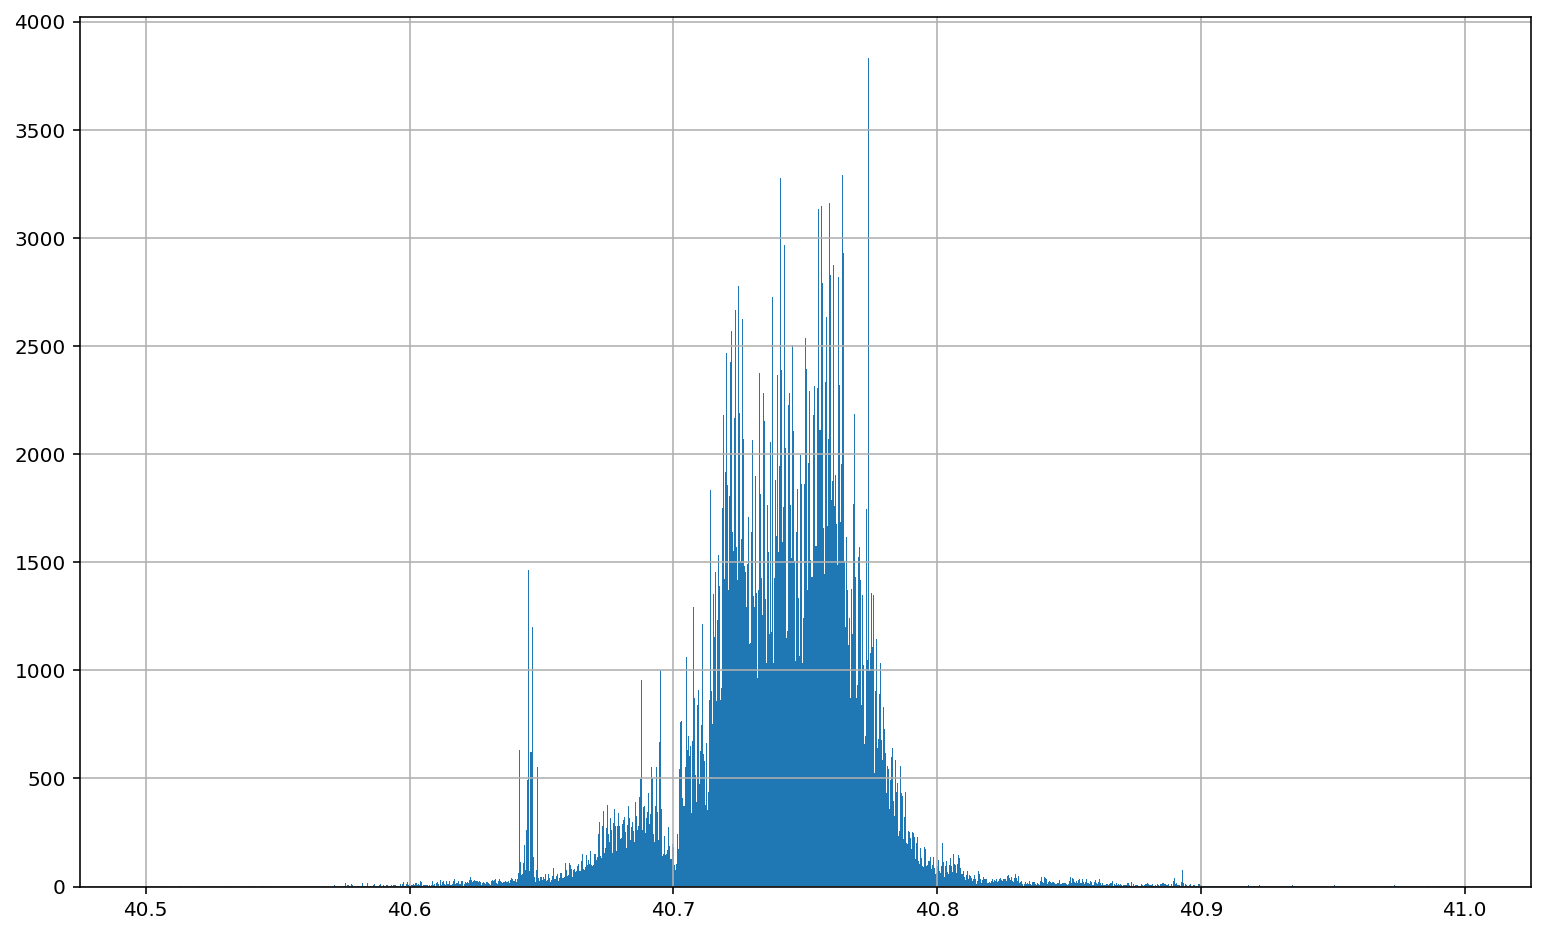

In [34]:
fig, ax = plt.subplots(figsize=(13, 8))
hist(data.Lat, bins = 2000, range = (40.5,41))

grid()
show()

In [35]:
Lon =  data.groupby("Lon")["Lon"].count()
Lon


Lon
-74.7733    1
-74.7659    1
-74.7039    1
-74.6631    1
-74.6563    1
           ..
-72.9237    1
-72.8987    1
-72.7734    2
-72.7006    2
-72.0666    1
Name: Lon, Length: 5621, dtype: int64

In [37]:
data

Date/Time      Lat      Lon    Base  dom  weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

[564516 rows x 7 columns]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-74.7733    , -74.77302933, -74.77275866, ..., -72.06714134,
        -72.06687067, -72.0666    ]),
 <a list of 10000 Patch objects>)

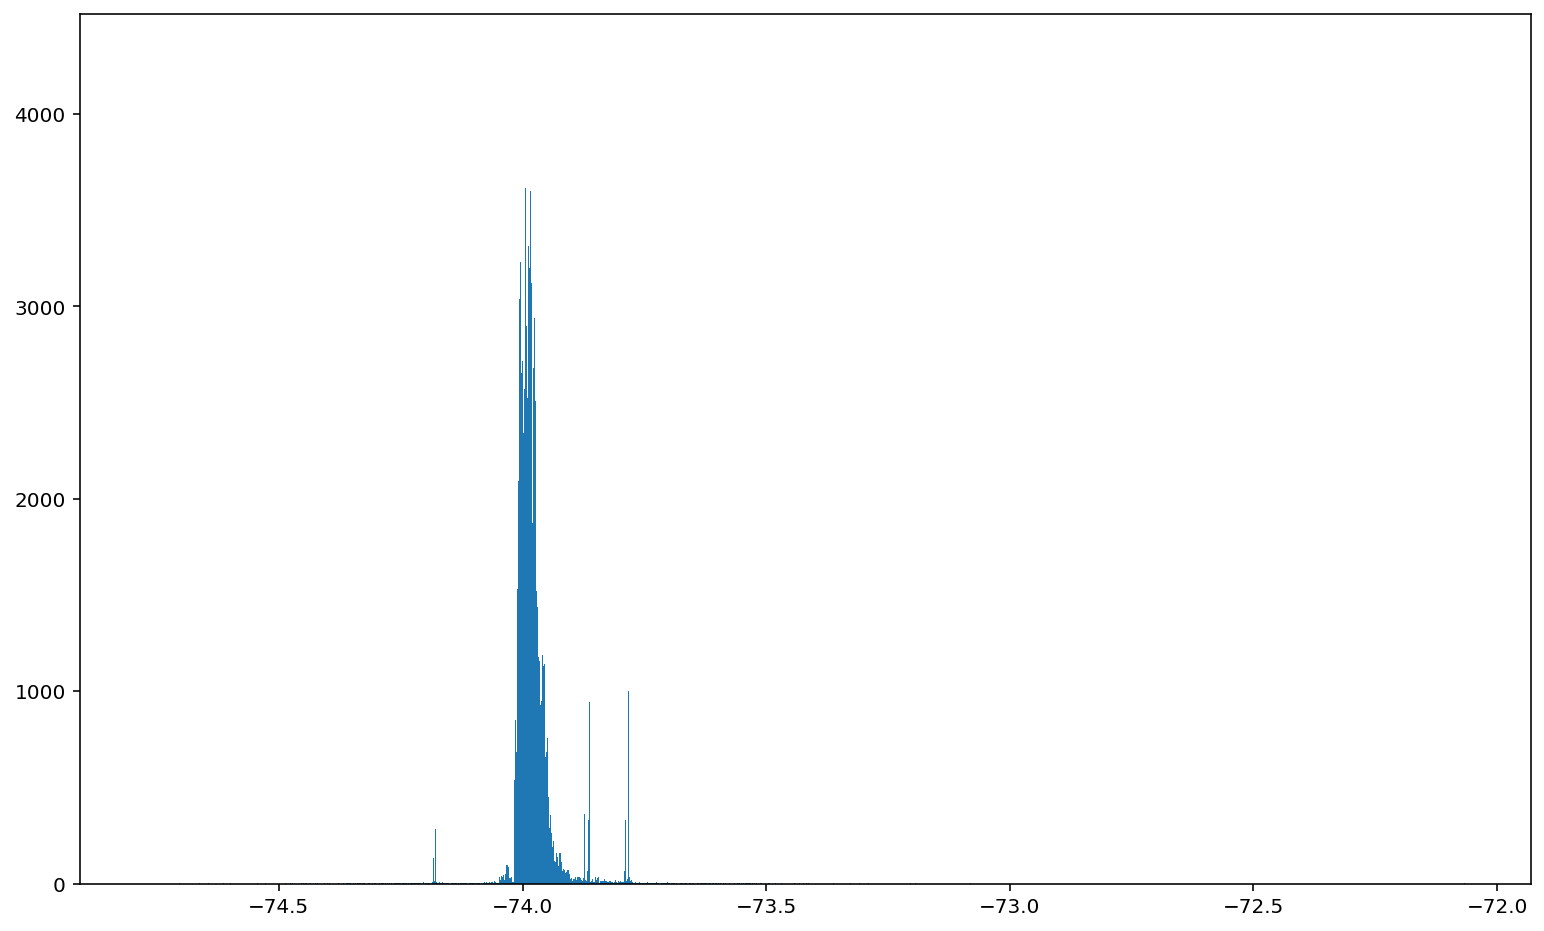

In [296]:
fig, ax = plt.subplots(figsize=(13, 8))
hist(data.Lon, bins = 10000)

# plotting map

In [49]:
BBox = (data.Lon.min(), data.Lon.max(), data.Lat.min(), data.Lat.max())

In [50]:
BBox

(-74.7733, -72.0666, 40.0729, 42.1166)

In [51]:
map = plt.imread("map6.png")


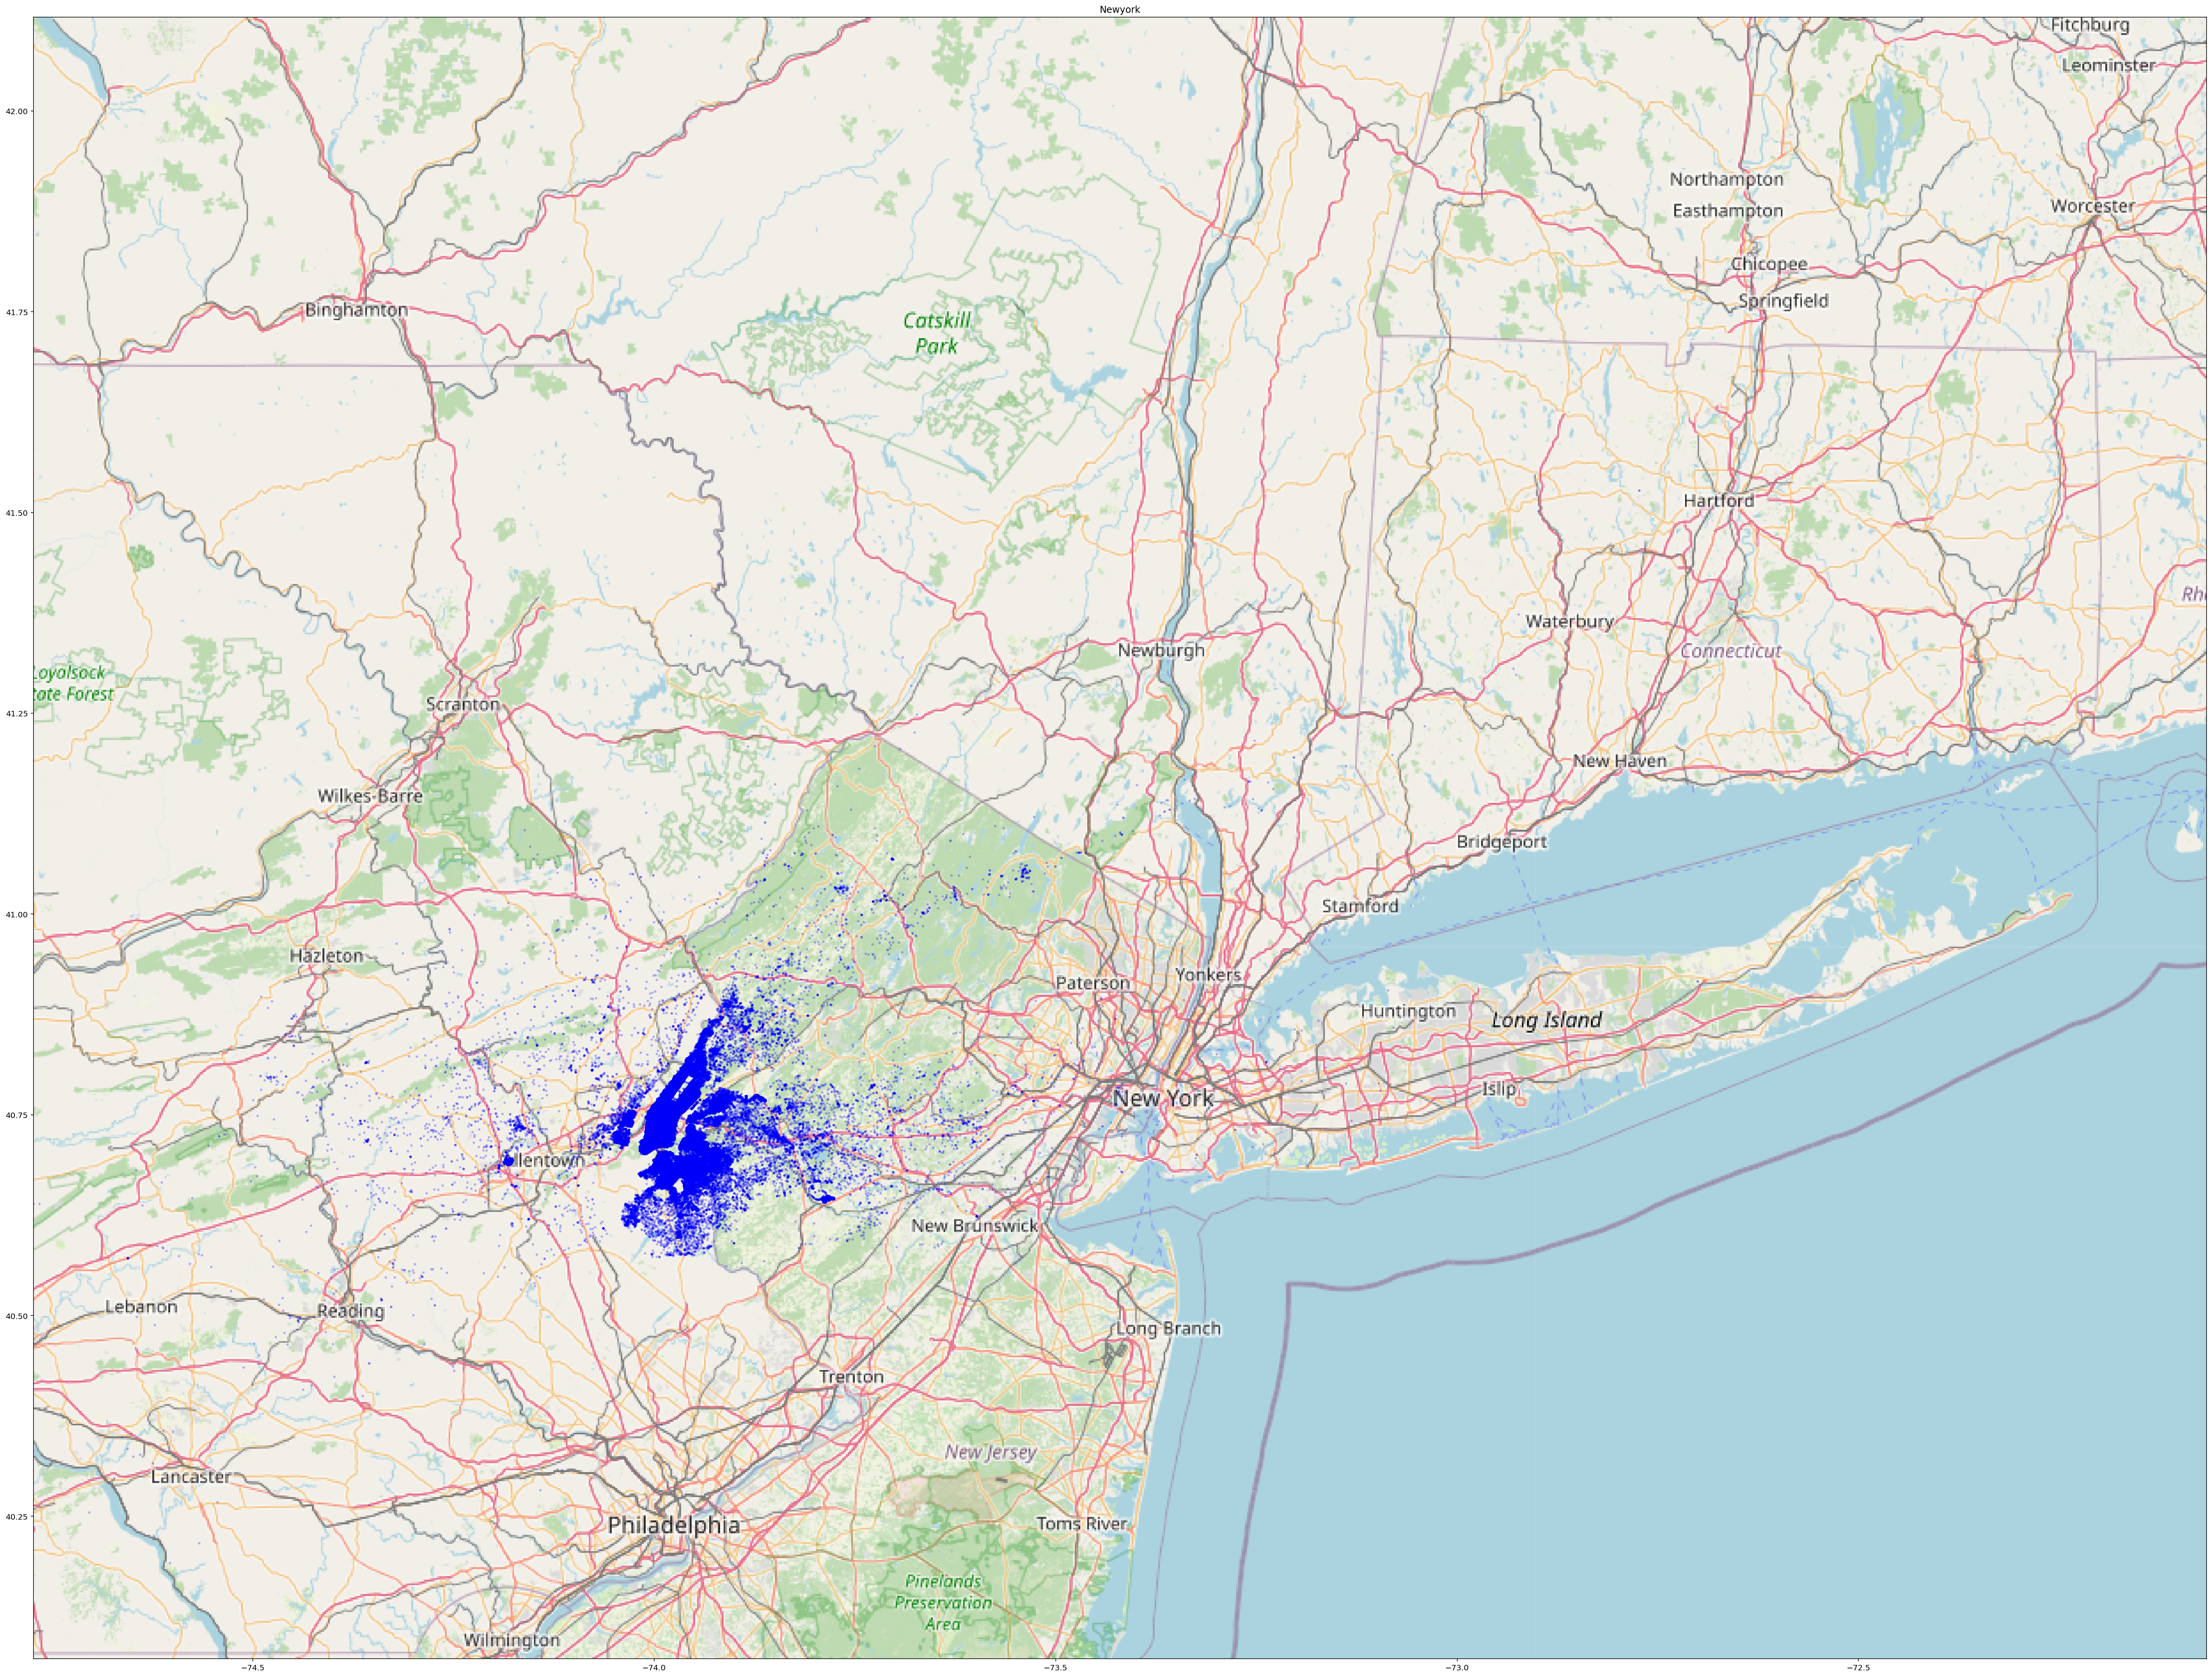

In [52]:
fig, ax = plt.subplots(figsize=(50, 40))
ax.scatter(data.Lon, data.Lat, alpha= 0.2, c='b', s=5)
ax.set_title('Newyork')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')
show()

### plotting the longitudes and latitudes without using map

(40.0729, 42.1166)

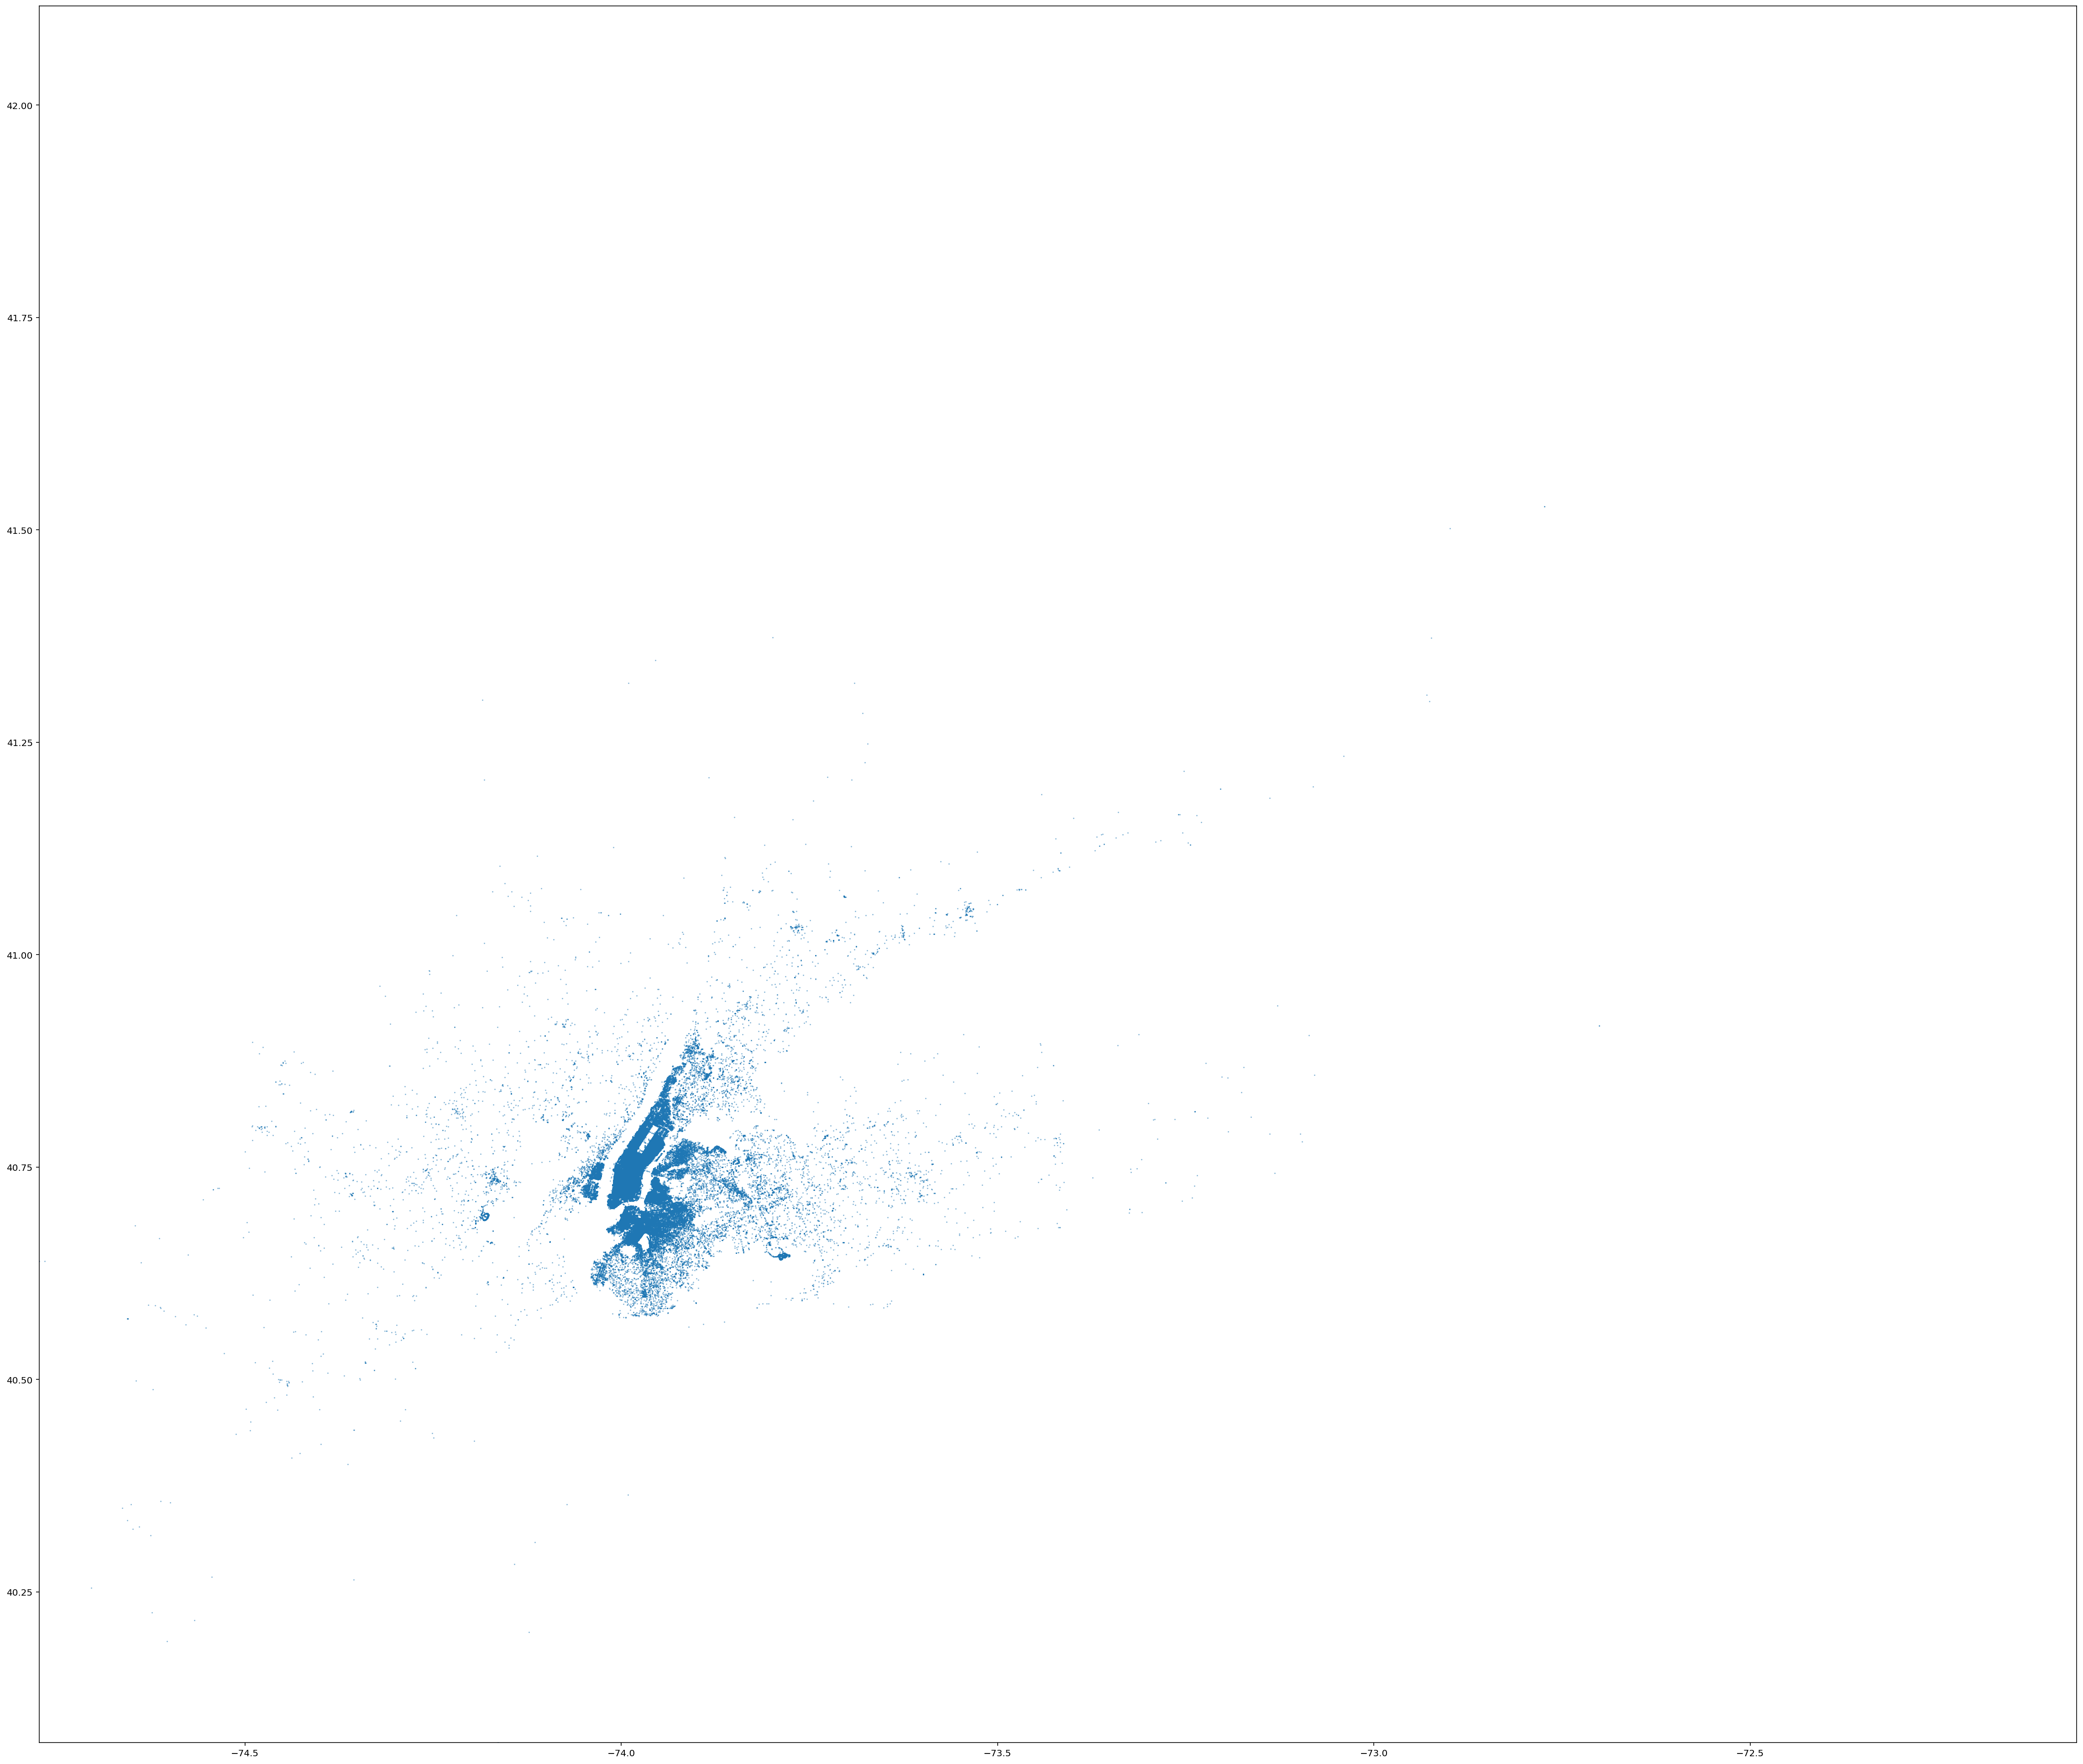

In [53]:
fig, ax = plt.subplots(figsize=(40, 35))
plot(data['Lon'],data['Lat'], '.', ms = 1, alpha = .5)
xlim(BBox[0],BBox[1])
ylim(BBox[2],BBox[3])

#### tracking the cars which runs most

In [54]:
data.groupby("Base").count()


Date/Time     Lat     Lon     dom  weekday    Hour
Base                                                      
B02512      35536   35536   35536   35536    35536   35536
B02598     183263  183263  183263  183263   183263  183263
B02617     108001  108001  108001  108001   108001  108001
B02682     227808  227808  227808  227808   227808  227808
B02764       9908    9908    9908    9908     9908    9908

In [369]:
B82 = data[data.Base == 'B02764']


In [370]:
B82.describe()

Lat          Lon          dom      weekday         Hour
count  9908.000000  9908.000000  9908.000000  9908.000000  9908.000000
mean     40.739266   -73.979240    15.723153     2.900888    14.855268
std       0.032893     0.051431     9.100094     1.811626     5.712984
min      40.572900   -74.542400     1.000000     0.000000     0.000000
25%      40.723200   -73.998325     8.000000     1.000000    11.000000
50%      40.741300   -73.986400    16.000000     3.000000    16.000000
75%      40.759200   -73.971600    24.000000     4.000000    19.000000
max      41.107100   -73.418000    30.000000     6.000000    23.000000

In [392]:
B82.describe()

Lat          Lon          dom      weekday         Hour
count  9908.000000  9908.000000  9908.000000  9908.000000  9908.000000
mean     40.739266   -73.979240    15.723153     2.900888    14.855268
std       0.032893     0.051431     9.100094     1.811626     5.712984
min      40.572900   -74.542400     1.000000     0.000000     0.000000
25%      40.723200   -73.998325     8.000000     1.000000    11.000000
50%      40.741300   -73.986400    16.000000     3.000000    16.000000
75%      40.759200   -73.971600    24.000000     4.000000    19.000000
max      41.107100   -73.418000    30.000000     6.000000    23.000000

### creating a polished csv for plotting of cars and their number of hours

In [62]:
polished_data = data.groupby(["Hour", "Base"])["Lat"].count().unstack()


In [64]:
polished_data.to_csv("filtered.csv", index = False)


In [79]:
data2 = pd.read_csv("filtered.csv")

In [80]:
data2

B02512  B02598  B02617  B02682  B02764
0      595    4018    2036    5051     210
1      349    2636    1379    3269     136
2      226    1697     868    2062      82
3      231    1668     937    2129      75
4      296    1977    1124    2614      84
5      485    2972    1756    4141     122
6     1148    5725    3711    7681     233
7     1511    7647    5098   10283     385
8     1295    7146    4664    9405     333
9     1171    5550    3635    7316     267
10    1295    5487    3709    7089     285
11    1381    5887    3771    7409     326
12    1410    6142    3956    7569     348
13    1624    7342    4427    8798     412
14    1836    9061    5174   10606     513
15    2422   11469    6756   13970     707
16    2810   13717    8072   16594     810
17    2966   14751    8701   18200     857
18    2688   14242    7943   17369     761
19    2419   12861    7143   15841     659
20    2288   12028    6725   14556     647
21    2221   12217    6896   14930     700
22    1755   10178    5748   12388     576
23    1114    6845    3772    8538     380

##### renaming taxi base id with thier service name 

In [72]:
def name(x):
    if x == "B02512":
        return "Unter"
    elif x == "B02598":
        return "Hinter"
    elif x == "B02617":
        return "Weiter"
    elif x =="B02682":
        return "Schmecken"
    elif x == "B02764":
        return "Danach-NY"

In [81]:
data2.rename(columns = lambda x : name(x), inplace = True)

In [84]:
data2["Hour"] = data2.index
data2

Unter  Hinter  Weiter  Schmecken  Danach-NY  Hour
0     595    4018    2036       5051        210     0
1     349    2636    1379       3269        136     1
2     226    1697     868       2062         82     2
3     231    1668     937       2129         75     3
4     296    1977    1124       2614         84     4
5     485    2972    1756       4141        122     5
6    1148    5725    3711       7681        233     6
7    1511    7647    5098      10283        385     7
8    1295    7146    4664       9405        333     8
9    1171    5550    3635       7316        267     9
10   1295    5487    3709       7089        285    10
11   1381    5887    3771       7409        326    11
12   1410    6142    3956       7569        348    12
13   1624    7342    4427       8798        412    13
14   1836    9061    5174      10606        513    14
15   2422   11469    6756      13970        707    15
16   2810   13717    8072      16594        810    16
17   2966   14751    8701      18200        857    17
18   2688   14242    7943      17369        761    18
19   2419   12861    7143      15841        659    19
20   2288   12028    6725      14556        647    20
21   2221   12217    6896      14930        700    21
22   1755   10178    5748      12388        576    22
23   1114    6845    3772       8538        380    23

#### plotting the different cars and their number of trips

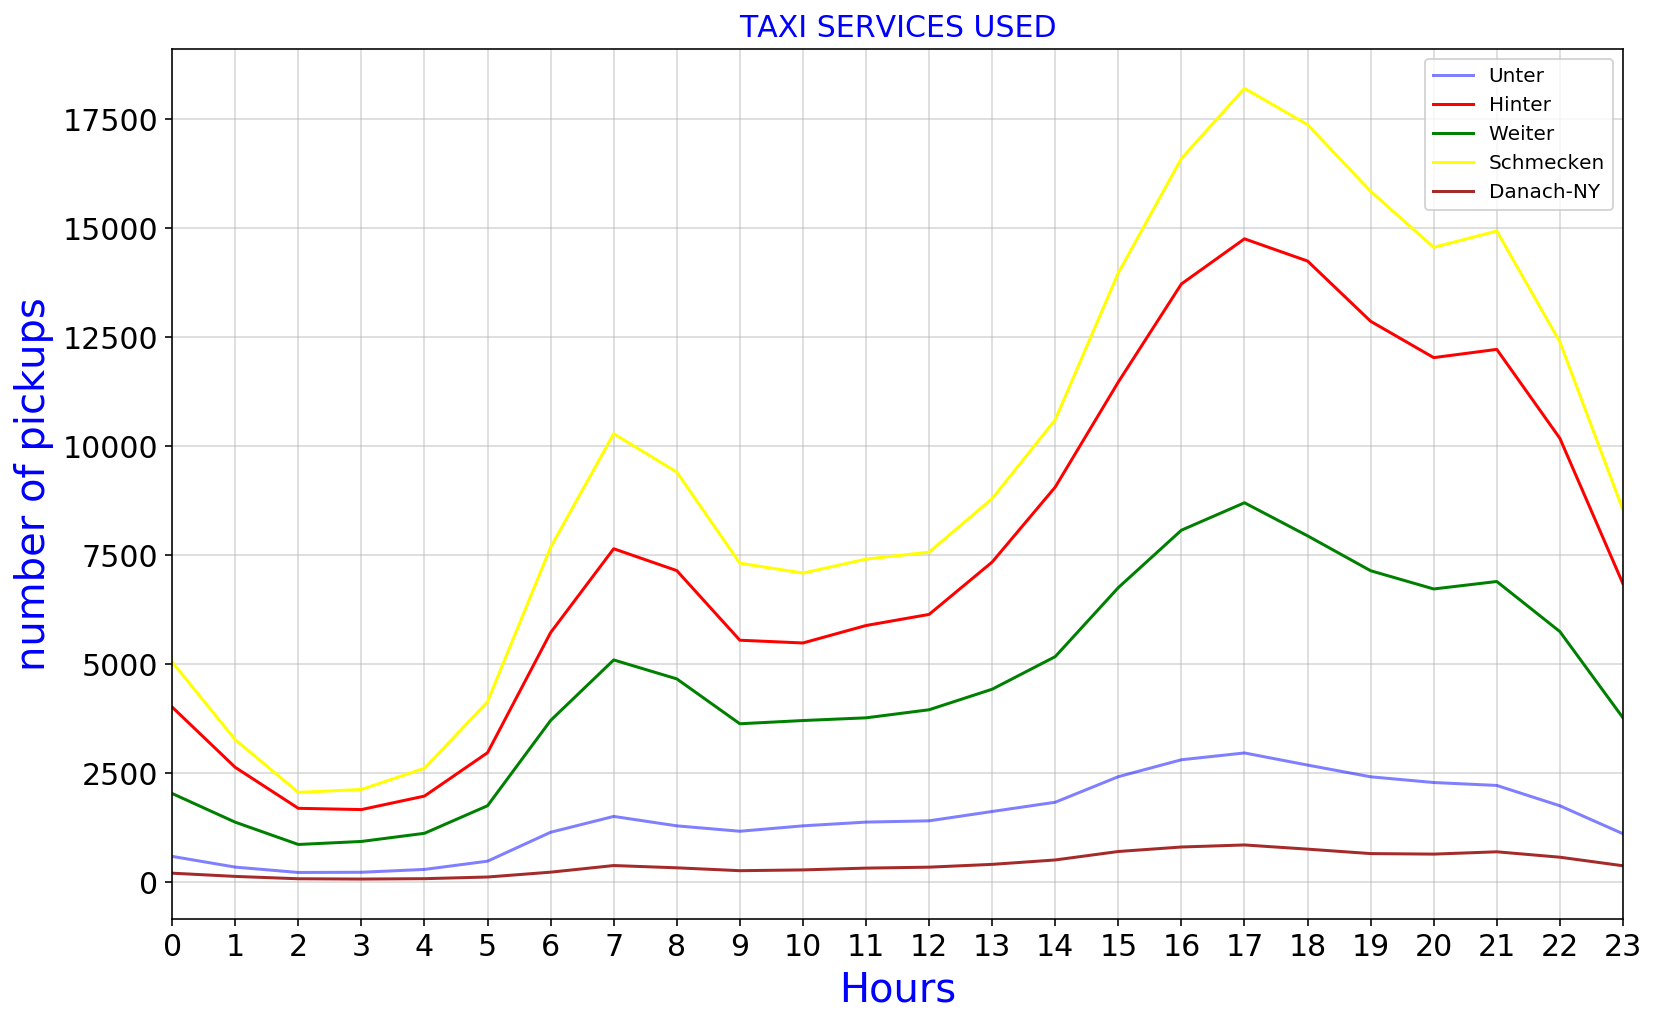

In [88]:
# ax = hour.plot(x="hour", y="Unter", kind="bar")
# hour.plot(x="hour", y="Hinter", kind="bar", ax=ax, color="C2")
# hour.plot(x="hour", y="Weiter", kind="bar", ax=ax, color="C3")

# plt.show()
fig, ax = plt.subplots(figsize=(13, 8))
title("TAXI SERVICES USED", fontsize = 15, color = 'blue')
ax = plt.gca()

data2.plot(kind='line',x='Hour',y='Unter',color = 'blue',ax=ax, fontsize = 15, alpha = .5, xlim = (0,23))
data2.plot(kind='line',x='Hour',y='Hinter', color='red', ax=ax)
data2.plot(kind = "line", x = "Hour", y = "Weiter", color = 'green', ax =ax)
data2.plot(kind = 'line', x = 'Hour', y = 'Schmecken', color = 'yellow', ax = ax)
data2.plot(kind = 'line', x = 'Hour', y = 'Danach-NY', color = "brown", ax = ax)
#       this is the additionnal modifications in graph

ylabel("number of pickups", fontsize = 20, color = 'blue')
xlabel("Hours", fontsize = 20, color = 'blue')
xticks(data2.Hour)
plt.grid(alpha = .5)
# plt.tick_params(axis='x', which='both',color = 'r',width = 2 ,labelsize=15, pad = 4
#                 ,direction ='out')
plt.show()

### distribution of total uber rides on their different 5 services by creating a new series and manipulate that new series and plotting on piechart


In [103]:
data.replace()

Date/Time      Lat      Lon    Base  dom  weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

[564516 rows x 7 columns]

In [99]:
def percentage_cal(x):
    return (x/sum(data.groupby("Base")["Lat"].count())*100)

In [106]:
data3 = data.groupby("Base")["Lat"].count().apply(lambda x: percentage_cal(x))

In [117]:
data3.index = data3.index.map({ "B02512" : "Unter" ,
                         "B02598" : "Hinter",
                         "B02617" : "Weiter",
                         "B02682" : "Schmecken",
                         "B02764" : "Danach-NY"})

In [122]:
data3.index[0]

'Unter'

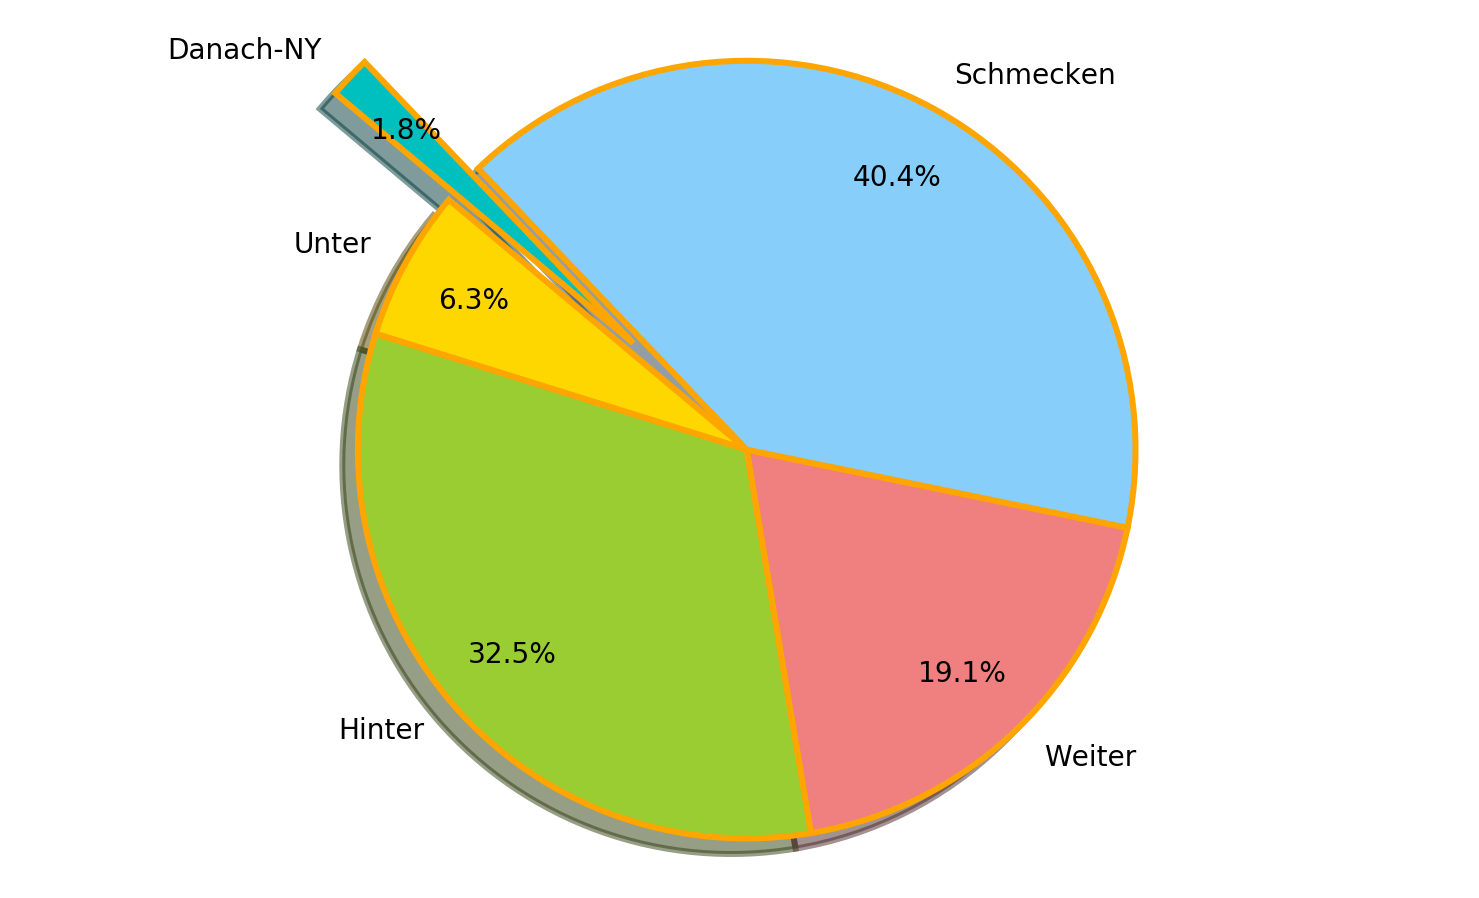

In [185]:
fig, ax = plt.subplots(figsize=(13, 8))

labels =  tuple(data3.index)
sizes = data3
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','c']
explode = (0, 0, 0, 0,0.4)  # explode 1st slice

# Plot
patches,texts,autotexts  =plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, labeldistance=1.1,
    startangle=140,pctdistance = 0.8,wedgeprops   = { 'linewidth' : 3,

                                'edgecolor' : "orange" }, textprops = {'fontsize' :14})
for autotext in autotexts:
    autotext.set_color('black')
    

plt.axis('equal')
grid()
plt.show()